## In this we have cleaned textual data, nominal data and selected only repository information
## Got correlation between non categorical, categorical and textual features.
## Decided on the target variable and got fixed on 11 categories in repository_language.

In [2]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as ss
from dython import nominal
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [3]:
df=pd.read_csv("/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_dataset.csv",low_memory=False,index_col=0)


FileNotFoundError: [Errno 2] File b'/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_dataset.csv' does not exist: b'/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_dataset.csv'

In [144]:
df.isnull().sum()

type                           0
created_at                     0
actor_attributes_type          0
repository_description      2484
repository_watchers            0
repository_stargazers          0
repository_forks               0
repository_fork                0
repository_size                0
repository_owner            1262
repository_private             0
repository_open_issues         0
repository_has_issues          0
repository_has_downloads       0
repository_has_wiki            0
repository_language            0
repository_created_at       1262
repository_pushed_at        1263
repository_master_branch       0
actor_attributes_name       3184
repo_url                       1
repo_name                      1
actor_login                    0
dtype: int64

In [120]:
df.columns

Index(['type', 'created_at', 'actor_attributes_type', 'repository_description',
       'repository_watchers', 'repository_stargazers', 'repository_forks',
       'repository_fork', 'repository_size', 'repository_owner',
       'repository_private', 'repository_open_issues', 'repository_has_issues',
       'repository_has_downloads', 'repository_has_wiki',
       'repository_language', 'repository_created_at', 'repository_pushed_at',
       'repository_master_branch', 'actor_attributes_name', 'repo_url',
       'repo_name', 'actor_login'],
      dtype='object')

In [121]:
df.select_dtypes(include='bool').head()

,repository_fork,repository_private,repository_has_issues,repository_has_downloads,repository_has_wiki
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [145]:
df.drop(['repo_url','type','created_at','actor_attributes_type','actor_attributes_name','actor_login','repository_pushed_at'],axis=1,inplace=True)

In [146]:
df.columns

Index(['repository_description', 'repository_watchers',
       'repository_stargazers', 'repository_forks', 'repository_fork',
       'repository_size', 'repository_owner', 'repository_private',
       'repository_open_issues', 'repository_has_issues',
       'repository_has_downloads', 'repository_has_wiki',
       'repository_language', 'repository_created_at',
       'repository_master_branch', 'repo_name'],
      dtype='object')

In [147]:
df[['repository_forks','repository_fork']].head()

,repository_forks,repository_fork
2,0,True
3,0,True
4,0,True
8,0,True
9,0,True


## Correlation between our features

In [125]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [126]:
def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [127]:
#Correlation between two features
corr_repo=theil_u(df['repository_owner'],df['repo_name'])


In [128]:
print("The correlation between repository_owner and repo_name is {}".format(corr_repo))
# we can drop one of them.


The correlation between repository_owner and repo_name is 1.0


In [148]:
df.drop(['repository_owner'],axis=1,inplace=True)

In [153]:
df.shape

(7054, 15)

In [157]:
df.dtypes

repository_description      object
repository_watchers          int64
repository_stargazers        int64
repository_forks             int64
repository_fork               bool
repository_size              int64
repository_private            bool
repository_open_issues       int64
repository_has_issues         bool
repository_has_downloads      bool
repository_has_wiki           bool
repository_language         object
repository_created_at       object
repository_master_branch    object
repo_name                   object
dtype: object

In [151]:
df.isnull().sum()

repository_description      2484
repository_watchers            0
repository_stargazers          0
repository_forks               0
repository_fork                0
repository_size                0
repository_private             0
repository_open_issues         0
repository_has_issues          0
repository_has_downloads       0
repository_has_wiki            0
repository_language            0
repository_created_at       1262
repository_master_branch       0
repo_name                      1
dtype: int64

In [154]:
def percentage_missing_values_dtype(df,Dtype):
    df_object=df.select_dtypes(include=Dtype)
    number_of_null_cells=df_object.isnull().sum()
    Percentage_object_columnwise=(number_of_null_cells/df.shape[0])*100
    return Percentage_object_columnwise

In [168]:
percentage_missing_values=percentage_missing_values_dtype(df,'int')
percentage_missing_values

repository_watchers       0.0
repository_stargazers     0.0
repository_forks          0.0
repository_size           0.0
repository_open_issues    0.0
dtype: float64

In [160]:
df.dropna(axis=0,inplace=True)

In [161]:
df.shape

(4570, 15)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


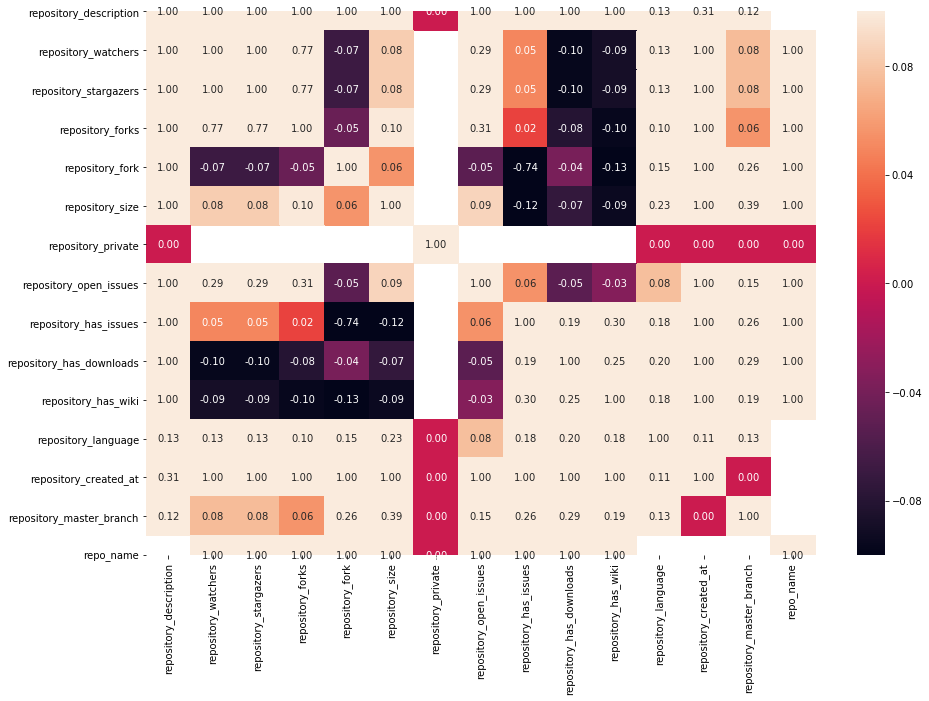

,repository_description,repository_watchers,repository_stargazers,repository_forks,repository_fork,repository_size,repository_private,repository_open_issues,repository_has_issues,repository_has_downloads,repository_has_wiki,repository_language,repository_created_at,repository_master_branch,repo_name
repository_description,1.000000,0.999706,0.999706,0.999931,0.995272,0.999495,0.0,0.999993,0.995353,1.000000,1.000000,0.125655,0.309347,0.122362,inf
repository_watchers,0.999706,1.000000,1.000000,0.769874,-0.068289,0.083896,NaN,0.290170,0.049698,-0.097154,-0.088481,0.129526,0.999423,0.075085,1.0
repository_stargazers,0.999706,1.000000,1.000000,0.769874,-0.068289,0.083896,NaN,0.290170,0.049698,-0.097154,-0.088481,0.129526,0.999423,0.075085,1.0
repository_forks,0.999931,0.769874,0.769874,1.000000,-0.045797,0.098804,NaN,0.313873,0.021252,-0.080350,-0.096481,0.099729,0.999749,0.055516,1.0
repository_fork,0.995272,-0.068289,-0.068289,-0.045797,1.000000,0.055572,NaN,-0.053001,-0.744774,-0.038295,-0.127798,0.148292,0.999410,0.262676,1.0
repository_size,0.999495,0.083896,0.083896,0.098804,0.055572,1.000000,NaN,0.087553,-0.116257,-0.073051,-0.094095,0.233502,0.999774,0.386902,1.0
repository_private,0.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0
repository_open_issues,0.999993,0.290170,0.290170,0.313873,-0.053001,0.087553,NaN,1.000000,0.055420,-0.052637,-0.033051,0.076631,0.999323,0.149077,1.0
repository_has_issues,0.995353,0.049698,0.049698,0.021252,-0.744774,-0.116257,NaN,0.055420,1.000000,0.187531,0.300663,0.181167,0.998453,0.259903,1.0
repository_has_downloads,1.000000,-0.097154,-0.097154,-0.080350,-0.038295,-0.073051,NaN,-0.052637,0.187531,1.000000,0.245469,0.202077,1.000000,0.287971,1.0


In [162]:
#correlation including all
nominal.associations(df, nominal_columns='auto', mark_columns=False, theil_u=False, plot=True, return_results=True, clustering=False, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE,figsize=(15,10))
            

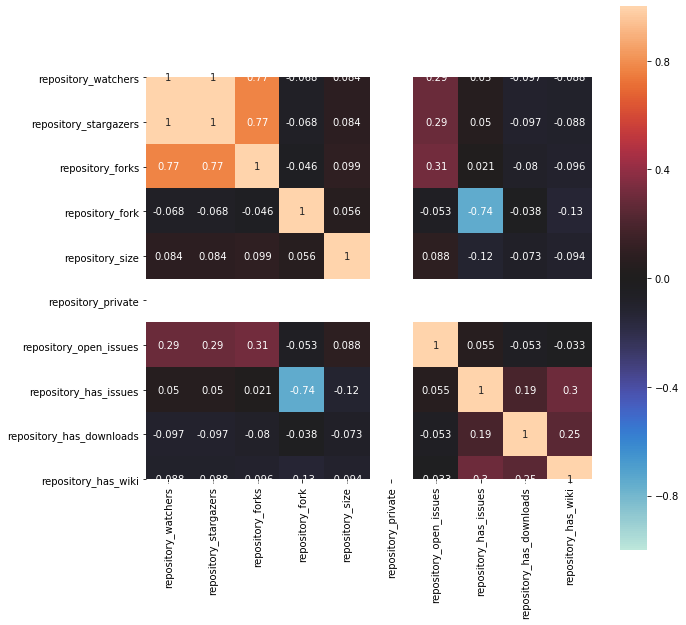

In [176]:
#correlation for non categorical
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,vmin=-1,vmax=1,center=0,square=True,annot=True)


In [177]:
df.head()

,repository_description,repository_watchers,repository_stargazers,repository_forks,repository_fork,repository_size,repository_private,repository_open_issues,repository_has_issues,repository_has_downloads,repository_has_wiki,repository_language,repository_created_at,repository_master_branch,repo_name
2414,ZF2 Based CMS that provides a highly-WYSIWYG i...,0,0,0,True,23182,False,0,False,True,True,PHP,2014-02-19T11:29:49-08:00,master,Rcm
2412,Vagrant base boxes for my projects as vbkick d...,0,0,0,False,608,False,0,True,True,True,Shell,2013-05-18T15:23:16-07:00,master,vbkick-boxarium
2410,Provides when.java wrappers for standard vert....,7,7,2,False,399,False,0,True,True,True,Java,2013-07-29T19:11:52-07:00,develop,vertx-mod-when
2408,Fatty Acids and Stable Isotopes in R,0,0,0,False,9924,False,1,True,True,True,TeX,2013-03-20T05:54:23-07:00,master,fastinR
2426,A repo to test github api,0,0,0,False,0,False,0,True,True,True,JavaScript,2014-04-01T14:36:16-07:00,master,ApiTestingRepo


In [178]:
df.repository_description.head()

2414    ZF2 Based CMS that provides a highly-WYSIWYG i...
2412    Vagrant base boxes for my projects as vbkick d...
2410    Provides when.java wrappers for standard vert....
2408                 Fatty Acids and Stable Isotopes in R
2426                            A repo to test github api
Name: repository_description, dtype: object

In [188]:
df.repository_fork.value_counts()

False    4097
True      473
Name: repository_fork, dtype: int64

In [191]:
df.repository_has_downloads.value_counts()

True     4485
False      85
Name: repository_has_downloads, dtype: int64

In [307]:
list_repo=df.repository_language.value_counts()>100


In [308]:
list_repo.sum()

11

In [309]:
df_repo_lang=pd.DataFrame(data=list_repo)


In [313]:
Languages=df_repo_lang.head(11).index

## we can see that there are 11 unique languages and other than these we can consider the category as other

In [320]:
df.loc[~df['repository_language'].isin(Languages) , 'repository_language'] = 'other'

In [331]:
df.repository_language.value_counts().count()

12

In [1]:
#correlation including all
nominal.associations(df, nominal_columns='auto', mark_columns=False, theil_u=False, plot=True, return_results=True, clustering=False, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE,figsize=(15,10))
            

NameError: name 'nominal' is not defined

In [329]:
#converting into csv and excel
df.to_excel('/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_cleaned.xlsx',engine='xlsxwriter')
df.to_csv(r'/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_cleaned.csv')